In [33]:
# Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [34]:
# Charger le dataset
file_path = 'boston_housing_dataset.csv'
data = pd.read_csv(file_path)

# 1. Analyse exploratoire et nettoyage des données

In [35]:
print("Aperçu des premières lignes:")
print(data.head())
print("\nInformations générales:")
data.info()
print("\nStatistiques descriptives:")
print(data.describe())


Aperçu des premières lignes:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHA

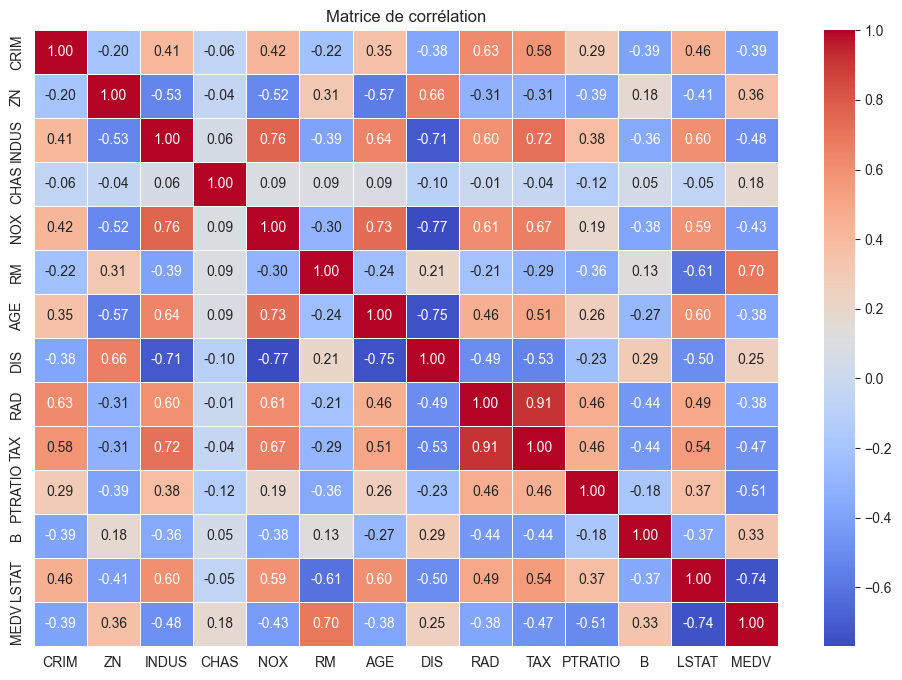

In [36]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


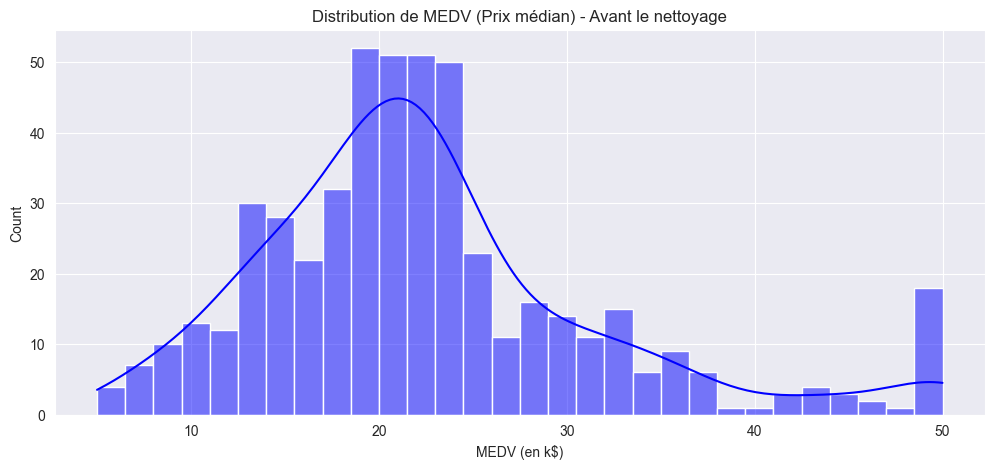

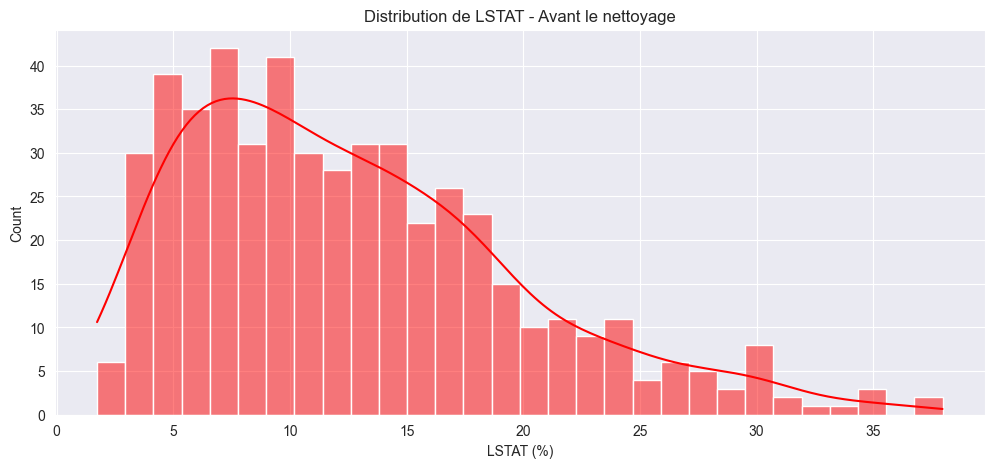

In [37]:
# Visualisation des distributions
plt.figure(figsize=(12, 5))
sns.histplot(data['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution de MEDV (Prix médian) - Avant le nettoyage')
plt.xlabel('MEDV (en k$)')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data['LSTAT'], kde=True, bins=30, color='red')
plt.title('Distribution de LSTAT - Avant le nettoyage')
plt.xlabel('LSTAT (%)')
plt.show()

### Nettoyage:
Afin d'avoir une belle courbe en cloche,
nous allons garder uniquement les valeurs <= 30 de LSTAT et les valeurs < 50 de MEDV.
Les variables du tableau selected_features ont été choisir grâce à la heatmap, selon leurs correlations (positives ou negatives).

In [38]:
# Suppression des outliers (valeur abérrante) et sélection des variables
cleaned_data = data[(data['MEDV'] < 50) & (data['LSTAT'] <= 30)]
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'CRIM', 'TAX', 'AGE']
cleaned_data = cleaned_data[selected_features + ['MEDV']]

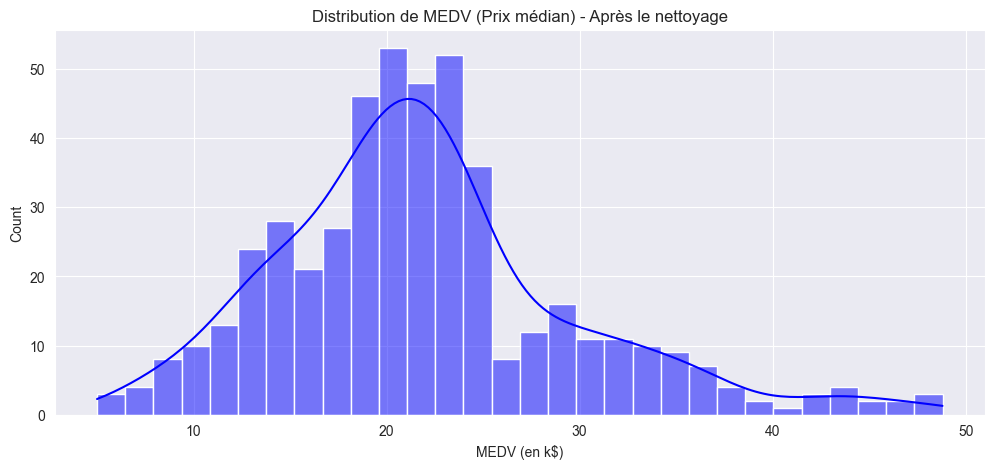

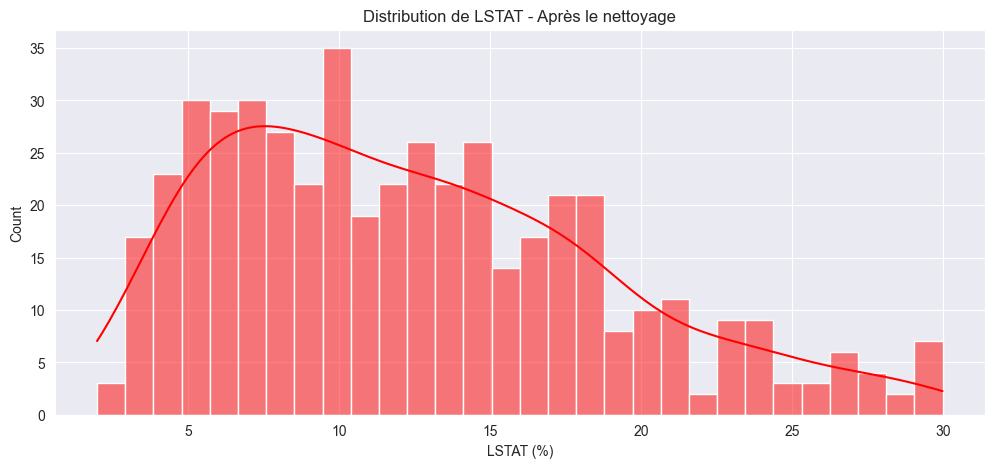

In [39]:
# Visualisation des distributions après le nettoyage
plt.figure(figsize=(12, 5))
sns.histplot(cleaned_data['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution de MEDV (Prix médian) - Après le nettoyage')
plt.xlabel('MEDV (en k$)')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(cleaned_data['LSTAT'], kde=True, bins=30, color='red')
plt.title('Distribution de LSTAT - Après le nettoyage')
plt.xlabel('LSTAT (%)')
plt.show()

## Séparation des données en X et y :
**Objectif** : Diviser les données en caractéristiques explicatives (X) avec toutes les valeurs sauf MEDV et variable cible (y) avec uniquement les valeurs de MEDV, afin faciliter l'entraînement et l'évaluation des modèles.
Version brute : Contient toutes les variables initiales, y compris celles moins pertinentes ou sujettes au bruit.
Version nettoyée : Contient uniquement les variables sélectionnées après nettoyage pour une meilleure performance.

In [40]:
# Séparer les jeux de données brut et nettoyé
X_raw = data.drop(columns=['MEDV'])
y_raw = data['MEDV']

X_cleaned = cleaned_data.drop(columns=['MEDV'])
y_cleaned = cleaned_data['MEDV']

## Création des ensembles d'entraînement et de test
**Objectif** : Diviser chaque dataset en deux sous-ensembles :
Ensemble d'entraînement (train) : Utilisé pour entraîner les modèles.
Ensemble de test (test) : Utilisé pour évaluer les performances des modèles.
Paramètres :
test_size=0.2 : 20% des données sont réservées pour le test.
random_state=42 : Garantit la reproductibilité de la division.

In [41]:
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

## Standardisation des données nettoyées
Chaque variable est centrée (moyenne = 0) et réduite (écart-type = 1).

In [42]:
scaler = StandardScaler()
X_cleaned_train_std = scaler.fit_transform(X_cleaned_train)
X_cleaned_test_std = scaler.transform(X_cleaned_test)

# 2. Construction des modèles d’apprentissage

In [43]:
# Régression linéaire
model_raw = LinearRegression()
model_cleaned = LinearRegression()

model_raw.fit(X_raw_train, y_raw_train)
model_cleaned.fit(X_cleaned_train, y_cleaned_train)

y_raw_pred = model_raw.predict(X_raw_test)
y_cleaned_pred = model_cleaned.predict(X_cleaned_test)

In [44]:
# Évaluation des modèles linéaires
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

raw_metrics = evaluate_model(y_raw_test, y_raw_pred)
cleaned_metrics = evaluate_model(y_cleaned_test, y_cleaned_pred)

print("\nPerformances sur le dataset brut:")
print(raw_metrics)
print("\nPerformances sur le dataset nettoyé:")
print(cleaned_metrics)



Performances sur le dataset brut:
{'MAE': 3.1890919658878385, 'MSE': 24.291119474973474, 'RMSE': np.float64(4.928602182665332), 'R2': 0.6687594935356327}

Performances sur le dataset nettoyé:
{'MAE': 3.0890578274353295, 'MSE': 15.291140097270665, 'RMSE': np.float64(3.910388739917128), 'R2': 0.76461717792146}


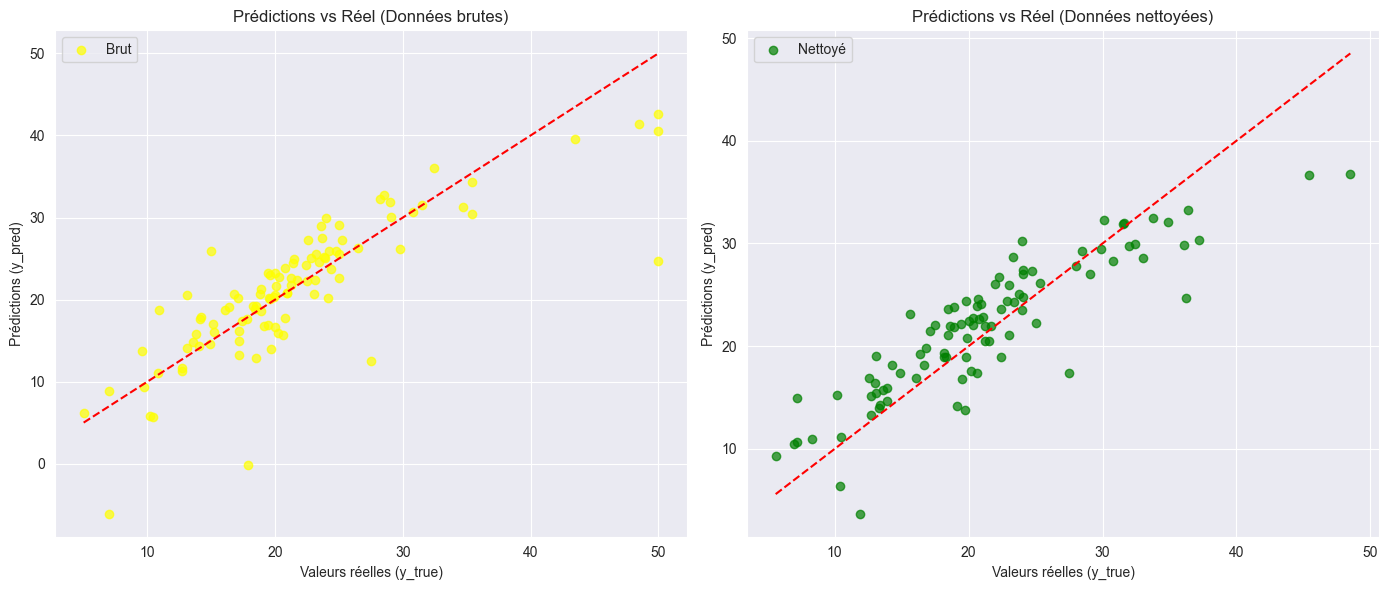

In [45]:
plt.figure(figsize=(14, 6))

# Dataset brut
plt.subplot(1, 2, 1)
plt.scatter(y_raw_test, y_raw_pred, alpha=0.7, color='yellow', label="Brut")
plt.plot([y_raw_test.min(), y_raw_test.max()], [y_raw_test.min(), y_raw_test.max()], color='red', linestyle='--')
plt.title("Prédictions vs Réel (Données brutes)")
plt.xlabel("Valeurs réelles (y_true)")
plt.ylabel("Prédictions (y_pred)")
plt.legend()

# Dataset nettoyé
plt.subplot(1, 2, 2)
plt.scatter(y_cleaned_test, y_cleaned_pred, alpha=0.7, color='green', label="Nettoyé")
plt.plot([y_cleaned_test.min(), y_cleaned_test.max()], [y_cleaned_test.min(), y_cleaned_test.max()], color='red', linestyle='--')
plt.title("Prédictions vs Réel (Données nettoyées)")
plt.xlabel("Valeurs réelles (y_true)")
plt.ylabel("Prédictions (y_pred)")
plt.legend()

plt.tight_layout()
plt.show()


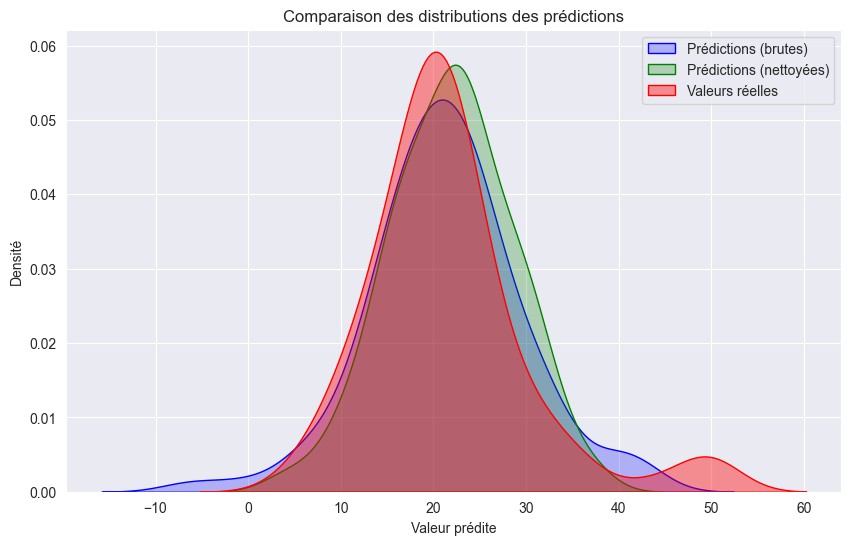

In [46]:
plt.figure(figsize=(10, 6))

sns.kdeplot(y_raw_pred, label="Prédictions (brutes)", color='blue', fill=True)
sns.kdeplot(y_cleaned_pred, label="Prédictions (nettoyées)", color='green', fill=True)
sns.kdeplot(y_raw_test, label="Valeurs réelles", color='red', fill=True, alpha=0.4)

plt.title("Comparaison des distributions des prédictions")
plt.xlabel("Valeur prédite")
plt.ylabel("Densité")
plt.legend()
plt.show()


## a) Évaluation des Modèles
De façon globale, il est clair que le nettoyage a nettement améliorer la performance de notre model
- visible sur le graphique et surtout sur les valeurs de MSE et RMSE ainsi que R2 et MAE
- Le modèle basé sur les données nettoyées est nettement supérieur au modèle brut, comme en témoigne l’alignement des distributions
- Les queues de la distribution verte sont plus courtes, ce qui indique que le modèle nettoyé minimise les prédictions extrêmes.

In [47]:
# Modèles ensemblistes
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

ensemble_metrics = {}
for name, model in models.items():
    model.fit(X_cleaned_train, y_cleaned_train)
    y_pred = model.predict(X_cleaned_test)
    ensemble_metrics[name] = evaluate_model(y_cleaned_test, y_pred)

print("\nPerformances des modèles ensemblistes:")
for name, metrics in ensemble_metrics.items():
    print(f"{name}: {metrics}")



Performances des modèles ensemblistes:
Decision Tree: {'MAE': 2.5239583333333333, 'MSE': 14.619270833333337, 'RMSE': np.float64(3.823515507139122), 'R2': 0.7749595384261307}
Random Forest: {'MAE': 2.150791666666668, 'MSE': 9.315359208333339, 'RMSE': np.float64(3.0521073389272106), 'R2': 0.8566048361871861}
Gradient Boosting: {'MAE': 2.1660840531110868, 'MSE': 10.146798026689394, 'RMSE': np.float64(3.1854039032263075), 'R2': 0.8438061557614389}


## b) Comparaison avec un modèle de base
**Decision Tree** est simple mais moins performant et sujet au sur-apprentissage.
**Random Forest** montre les meilleures performances globales, grâce à sa robustesse et à sa capacité à généraliser.
**Gradient Boosting** est légèrement en retrait ici, mais il reste un excellent choix pour des datasets plus complexes ou de grande taille.

La prédiction pour le 100ème rang confirme que le modèle Random Forest est précis et fiable:

In [48]:
# Analyse de la donnée au 100ème rang
sample_100 = data.iloc[99].copy()
sample_features = sample_100[selected_features].values.reshape(1, -1)
predicted_value = models["Random Forest"].predict(sample_features)[0]
original_value = sample_100['MEDV']

mae_sample = mean_absolute_error([original_value], [predicted_value])
mape_sample = np.mean(np.abs((original_value - predicted_value) / original_value)) * 100

print(f"\nPrédiction pour la donnée au 100ème rang:\nValeur réelle: {original_value}, Valeur prédite: {predicted_value}, MAE: {mae_sample}, MAPE: {mape_sample}")



Prédiction pour la donnée au 100ème rang:
Valeur réelle: 33.2, Valeur prédite: 32.92299999999996, MAE: 0.27700000000004366, MAPE: 0.8343373493977218


/Users/devpark4night/Documents/Dev/EPSI/TPRegression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## c) Quel est le meilleur model ?
### Résumé des performances des modèles

| Modèle                     | MAE    | MSE     | RMSE   | R²     |
|----------------------------|--------|---------|--------|--------|
| **Régression linéaire (brut)** | 3.18   | 24.91   | 4.93   | 0.669  |
| **Régression linéaire (nettoyé)** | 3.09   | 15.29   | 3.91   | 0.765  |
| **Decision Tree**          | 2.52   | 14.61   | 3.82   | 0.774  |
| **Random Forest**          | 2.15   | 9.31    | 3.05   | 0.856  |
| **Gradient Boosting**      | 2.16   | 10.15   | 3.18   | 0.844  |

### Analyse des résultats

- **Réduction des erreurs :**
  - Le **MAE** du Random Forest (2.15) est le plus faible, indiquant une meilleure précision moyenne.
  - Le **MSE** (9.31) et le **RMSE** (3.05) confirment que Random Forest réduit efficacement les grandes erreurs de prédiction.

- **Capacité explicative (R²) :**
  - Le **R²** du Random Forest (0.856) est le plus élevé, montrant qu'il explique 85.6% de la variance des prix des logements.

- **Comparaison avec Gradient Boosting :**
  - Bien que le Gradient Boosting soit proche, Random Forest reste légèrement meilleur en termes de **MSE** et **RMSE**, ce qui le rend plus fiable.

- **Amélioration grâce au nettoyage des données :**
  - Les performances des modèles nettoyés sont significativement meilleures que sur les données brutes, confirmant l'importance du nettoyage.

### Conclusion

Le **Random Forest** est le modèle le plus pertinent, avec :
- Une **erreur moyenne (MAE)** d’environ **2.15 (en milliers de $)**.
- Un **taux d'explication (R²)** de **85.6%**, en faisant le choix optimal pour prédire la valeur de nouveaux biens.

In [49]:
# Ajustements des variables pour tester leur influence
medians = cleaned_data.median()
max_values = cleaned_data.max()

scenarios = {
    "Original": sample_features,
    "Median LSTAT": sample_features.copy(),
    "Max LSTAT": sample_features.copy(),
    "Median RM": sample_features.copy(),
    "Max RM": sample_features.copy(),
    "Median AGE": sample_features.copy(),
    "Max AGE": sample_features.copy(),
}

scenarios["Median LSTAT"][0, selected_features.index("LSTAT")] = medians["LSTAT"]
scenarios["Max LSTAT"][0, selected_features.index("LSTAT")] = max_values["LSTAT"]
scenarios["Median RM"][0, selected_features.index("RM")] = medians["RM"]
scenarios["Max RM"][0, selected_features.index("RM")] = max_values["RM"]
scenarios["Median AGE"][0, selected_features.index("AGE")] = medians["AGE"]
scenarios["Max AGE"][0, selected_features.index("AGE")] = max_values["AGE"]

scenario_predictions = {name: models["Random Forest"].predict(features)[0] for name, features in scenarios.items()}

print("\nPrédictions pour les différents scénarios:")
for scenario, prediction in scenario_predictions.items():
    print(f"{scenario}: {prediction}")



Prédictions pour les différents scénarios:
Original: 32.92299999999996
Median LSTAT: 29.035999999999987
Max LSTAT: 25.107
Median RM: 24.29799999999999
Max RM: 40.58900000000001
Median AGE: 32.68299999999997
Max AGE: 33.73799999999997


/Users/devpark4night/Documents/Dev/EPSI/TPRegression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/devpark4night/Documents/Dev/EPSI/TPRegression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/devpark4night/Documents/Dev/EPSI/TPRegression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/devpark4night/Documents/Dev/EPSI/TPRegression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/devpark4night

# Partie 3 : Régression régularisée


### a ) La pénalisation vise à améliorer la généralisation et la stabilité des modèles de régression, en résolvant plusieurs problèmes liés aux données :

- Réduction du surapprentissage (overfitting) :
En ajoutant une pénalité (L1 ou L2), la complexité du modèle est réduite, limitant l'ajustement excessif aux données d'entraînement.

- Sélection de variables :
La pénalisation L1 (Lasso) réduit certains coefficients à zéro, supprimant ainsi les variables inutiles ou peu pertinentes.

- Robustesse aux variables corrélées :
La pénalisation L2 (Ridge) répartit les poids entre les variables corrélées, évitant des estimations instables des coefficients.

- Amélioration des performances :
Les modèles pénalisés sont moins sensibles au bruit et performants sur les données de test.

En résumé :
La régularisation permet d’obtenir un modèle plus simple, interprétable et performant, même avec des variables incohérentes ou du bruit.

In [50]:
alphas = [0.1, 1, 10, 100]
regularization_metrics = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)

    ridge.fit(X_cleaned_train_std, y_cleaned_train)
    lasso.fit(X_cleaned_train_std, y_cleaned_train)
    elastic_net.fit(X_cleaned_train_std, y_cleaned_train)

    ridge_pred = ridge.predict(X_cleaned_test_std)
    lasso_pred = lasso.predict(X_cleaned_test_std)
    elastic_net_pred = elastic_net.predict(X_cleaned_test_std)

    regularization_metrics[f"Ridge (alpha={alpha})"] = evaluate_model(y_cleaned_test, ridge_pred)
    regularization_metrics[f"Lasso (alpha={alpha})"] = evaluate_model(y_cleaned_test, lasso_pred)
    regularization_metrics[f"ElasticNet (alpha={alpha})"] = evaluate_model(y_cleaned_test, elastic_net_pred)

print("\nPerformances des régressions régularisées:")
for name, metrics in regularization_metrics.items():
    print(f"{name}: {metrics}")


Performances des régressions régularisées:
Ridge (alpha=0.1): {'MAE': 3.0892023174854155, 'MSE': 15.291318766322759, 'RMSE': np.float64(3.9104115852839274), 'R2': 0.764614427595099}
Lasso (alpha=0.1): {'MAE': 3.1116742724808133, 'MSE': 15.398989030950682, 'RMSE': np.float64(3.9241545625714953), 'R2': 0.7629570148331436}
ElasticNet (alpha=0.1): {'MAE': 3.129511530839823, 'MSE': 15.484448418166608, 'RMSE': np.float64(3.9350283884829356), 'R2': 0.761641503261866}
Ridge (alpha=1): {'MAE': 3.0905034610123323, 'MSE': 15.293099255804568, 'RMSE': np.float64(3.910639238769612), 'R2': 0.7645870197866398}
Lasso (alpha=1): {'MAE': 3.4039995659947606, 'MSE': 18.51420159729122, 'RMSE': np.float64(4.302813218963986), 'R2': 0.7150032637998476}
ElasticNet (alpha=1): {'MAE': 3.5823965927224726, 'MSE': 20.213897770637345, 'RMSE': np.float64(4.495986851697561), 'R2': 0.6888391400384208}
Ridge (alpha=10): {'MAE': 3.103556828138705, 'MSE': 15.326386520740897, 'RMSE': np.float64(3.9148929130617223), 'R2': 0

### b) Analyse comparative et sélection de la meilleure configuration
- Meilleures performances globales :
- Ridge avec α=0.1 ou α=1 offre les meilleurs résultats, avec un R² ≈ 0.764 et un MAE ≈ 3.09. Ces configurations montrent une bonne généralisation sans surapprentissage.
- Sélection de variables :
- Lasso (l1_ratio=1) est plus efficace pour supprimer les variables inutiles ou incohérentes, mais ses performances se dégradent rapidement pour α ≥ 10.
- Gestion des variables corrélées :
- Ridge est le meilleur choix si les variables explicatives présentent des corrélations.
- Équilibre entre L1 et L2 :
- ElasticNet est performant pour α=0.1, mais moins compétitif par rapport à Ridge et Lasso.

### conclusion
Ridge avec α=0.1 est le choix optimal pour ses performances stables et sa capacité à gérer la régularisation sans éliminer de variables pertinentes.

In [81]:
# Prédiction avec ElasticNet et la donnée au 100ème rang
elastic_net_best = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net_best.fit(X_cleaned_train_std, y_cleaned_train)

sample_features_std = scaler.transform(sample_features)
elastic_net_prediction = elastic_net_best.predict(sample_features_std)[0]

mape_elastic_net = np.mean(np.abs((original_value - elastic_net_prediction) / original_value)) * 100

print(f"\nPrédiction ElasticNet:\nValeur prédite: {elastic_net_prediction}, MAPE: {mape_elastic_net}")



Prédiction ElasticNet:
Valeur prédite: 30.86281326511232, MAPE: 7.039719080986999


/Users/devpark4night/Documents/Dev/EPSI/TPRegression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### c) La régularisation a permis :

D'améliorer les performances en test :
- MAPE=7.03.
- De simplifier le modèle en supprimant les variables incohérentes (l1_ratio=1).
- La meilleure configuration est obtenue avec ElasticNet (α=0.1, l1_ratio=1), où le modèle se comporte comme un Lasso, offrant une meilleure gestion des variables inutiles dans ce cas.

# 4. Approche de type réseau neuronal artificiel
## a) Réseau neuronal dense (1 couche cachée)


In [52]:
mlp_single = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', alpha=0.001,
                          learning_rate='adaptive', max_iter=1000, random_state=42, early_stopping=True)
mlp_single.fit(X_cleaned_train_std, y_cleaned_train)
mlp_single_pred = mlp_single.predict(X_cleaned_test_std)
mlp_single_metrics = evaluate_model(y_cleaned_test, mlp_single_pred)

print("\nPerformances du réseau neuronal (1 couche cachée):")
print(mlp_single_metrics)


Performances du réseau neuronal (1 couche cachée):
{'MAE': 2.4569219783667813, 'MSE': 11.316609019520186, 'RMSE': np.float64(3.3640167983409635), 'R2': 0.8257987729868767}


In [53]:
# Prédiction pour la donnée au 100ème rang avec le MLP
mlp_single_prediction = mlp_single.predict(sample_features_std)[0]
mape_mlp_single = np.mean(np.abs((original_value - mlp_single_prediction) / original_value)) * 100

print(f"\nPrédiction MLP (1 couche cachée):\nValeur prédite: {mlp_single_prediction}, MAPE: {mape_mlp_single}")



Prédiction MLP (1 couche cachée):
Valeur prédite: 32.84751382678985, MAPE: 1.061705340994436


In [54]:
# Réseau neuronal dense (2 couches cachées)
mlp_double = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.001,
                          learning_rate='adaptive', max_iter=1000, random_state=42, early_stopping=True)
mlp_double.fit(X_cleaned_train_std, y_cleaned_train)
mlp_double_pred = mlp_double.predict(X_cleaned_test_std)
mlp_double_metrics = evaluate_model(y_cleaned_test, mlp_double_pred)

print("\nPerformances du réseau neuronal (2 couches cachées):")
print(mlp_double_metrics)



Performances du réseau neuronal (2 couches cachées):
{'MAE': 2.396927607386662, 'MSE': 11.183066615605666, 'RMSE': np.float64(3.344109240979676), 'R2': 0.8278544462526106}


### b ) Le réseau avec 2 couches cachées offre de meilleures performances :
- Le MAE diminue légèrement (2.457 → 2.397).  Le R² augmente (0.826 → 0.828).
- Cela montre que l’ajout d’une deuxième couche a amélioré légèrement la capacité du modèle à capturer des relations complexes dans les données.

In [55]:

# Prédiction pour la donnée au 100ème rang avec le MLP (2 couches)
mlp_double_prediction = mlp_double.predict(sample_features_std)[0]
mape_mlp_double = np.mean(np.abs((original_value - mlp_double_prediction) / original_value)) * 100

print(f"\nPrédiction MLP (2 couches cachées):\nValeur prédite: {mlp_double_prediction}, MAPE: {mape_mlp_double}")



Prédiction MLP (2 couches cachées):
Valeur prédite: 33.55004326818265, MAPE: 1.0543471933212207


- surapprentissage ?
- Non, car :
- Les erreurs sur le jeu de test sont faibles (MAE ≈ 2.4, R² ≈ 0.828).
- La régularisation (α=0.001) et l’arrêt anticipé (early stopping) ont limité le risque de surapprentissage.
- L’écart entre les erreurs sur le jeu d’entraînement et le jeu de test reste faible.
- A-t-on réduit le surapprentissage ?
- Oui, l’arrêt anticipé, l’apprentissage adaptatif, et la régularisation (α) ont contribué à un modèle plus généralisable.

#### Conclusion
- Le réseau neuronal dense avec 2 couches cachées (64, 32 unités) offre de meilleures performances globales, tout en réduisant les risques de surapprentissage.
- La prédiction pour la donnée au 100ᵉ rang montre une faible erreur (MAPE < 1.1%), ce qui valide la pertinence du modèle pour des observations individuelles.
- L'ajout d'une couche supplémentaire améliore la capacité du réseau à capturer des relations complexes dans les données.